##### Milestone 3:Model building and training

#####Split data into test and train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming 'processed_df_final' is your final cleaned and processed DataFrame
# The target variable is 'value_x'.
if 'value_x' not in processed_df_final.columns:
    raise ValueError("Target variable 'value_x' not found in processed_df_final.")

y = processed_df_final['value_x']
X = processed_df_final.drop(columns=['value_x'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60584, 1042)
X_test shape: (15147, 1042)
y_train shape: (60584,)
y_test shape: (15147,)


In [ ]:
# Save the training and testing sets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Training and testing sets saved to X_train.csv, X_test.csv, y_train.csv, and y_test.csv")

Training and testing sets saved to X_train.csv, X_test.csv, y_train.csv, and y_test.csv


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Linear Regression model trained successfully.

Model Evaluation:
R-squared (R2) Score: 1.0000
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


## polynomial_regression


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load the training and testing data using the final processed files
X_train = pd.read_csv('X_train_final_processed.csv')
y_train = pd.read_csv('y_train_final_processed.csv')
X_test = pd.read_csv('X_test_final_processed.csv')
y_test = pd.read_csv('y_test_final_processed.csv')

# Ensure y_train and y_test are 1D arrays for scikit-learn models if they are DataFrames
y_train = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) else y_train
y_test = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) else y_test

print("Training and testing data loaded successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Training and testing data loaded successfully.
X_train shape: (208163, 408)
y_train shape: (437021,)
X_test shape: (109256, 408)
y_test shape: (109256,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # Added this import
import os

print("--- Starting full data re-preparation for correct target variable ---")

# --- Helper function to find and load raw CSVs ---
def load_raw_csv(filename, encoding='utf-8'):
    try:
        # Prioritize current directory, then 'sample_data' subdirectory
        if os.path.exists(filename):
            return pd.read_csv(filename, low_memory=False, encoding=encoding)
        elif os.path.exists(os.path.join('sample_data', filename)):
            return pd.read_csv(os.path.join('sample_data', filename), low_memory=False, encoding=encoding)
        else:
            raise FileNotFoundError(f"'{filename}' not found in current directory or 'sample_data/'.")
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError with {filename} using {encoding}. Trying 'latin1'...")
        if os.path.exists(filename):
            return pd.read_csv(filename, low_memory=False, encoding='latin1')
        elif os.path.exists(os.path.join('sample_data', filename)):
            return pd.read_csv(os.path.join('sample_data', filename), low_memory=False, encoding='latin1')
        else:
            raise # Re-raise if 'latin1' also fails

# --- Step 1: Reload all raw datasets ---
try:
    # Player-related data
    injuries_df = load_raw_csv("player_injuries.csv")
    latest_market_value_df = load_raw_csv("player_latest_market_value.csv")
    market_value_df = load_raw_csv("player_market_value.csv")
    national_perf_df = load_raw_csv("player_national_performances.csv")
    performances_df = load_raw_csv("player_performances.csv")
    profiles_df = load_raw_csv("player_profiles.csv")
    teammates_df = load_raw_csv("player_teammates_played_with.csv")

    # Team-related data (if needed, but not directly used in this segment)
    team_children_df = load_raw_csv("team_children.csv")
    team_comp_season_df = load_raw_csv("team_competitions_seasons.csv")
    team_details_df = load_raw_csv("team_details.csv")

    # Transfer data (if needed)
    transfer_history_df = load_raw_csv("transfer_history.csv")

    # Sentiment / tweets data
    tweets_df = load_raw_csv("tweets_premier_league_footballers.csv", encoding='latin1') # Explicitly use latin1

    print("All raw datasets loaded successfully.")

except FileNotFoundError as e:
    print(f"Error loading file: {e}. Please ensure all raw data files are uploaded correctly.")
    raise

# --- Step 2: Correct Merging Logic and Initial Feature Engineering ---

# Ensure 'player_id' columns are of consistent type before merging
for df_name in [profiles_df, latest_market_value_df, market_value_df, performances_df, national_perf_df, injuries_df, tweets_df]:
    if 'player_id' in df_name.columns:
        df_name['player_id'] = pd.to_numeric(df_name['player_id'], errors='coerce').astype('Int64')

# Standardize player names in profiles_df to match tweets_df format for merging
profiles_df['clean_player_name'] = profiles_df['player_name'].str.split('(', n=1).str[0].str.strip().str.upper()

# Start merging using player profiles as the base
df_processed_pipeline = profiles_df.copy()
print(f"Initial profiles_df shape: {df_processed_pipeline.shape}")

# 1. Merge latest market value (THIS IS OUR PRIMARY TARGET VARIABLE, named 'value_x')
latest_market_value_df_renamed = latest_market_value_df.drop(columns=['player_name'], errors='ignore').rename(columns={'value': 'value_x'})
df_processed_pipeline = df_processed_pipeline.merge(
    latest_market_value_df_renamed,
    on='player_id',
    how='inner'
)
print(f"After latest_market_value_df merge (value_x is target): {df_processed_pipeline.shape}")

# 2. Process historical market values (market_value_df) to create features
market_value_features = market_value_df.groupby('player_id')['value'].agg(
    mean_historical_value='mean',
    max_historical_value='max',
    min_historical_value='min',
    std_historical_value='std',
    num_historical_records='count'
).reset_index()
market_value_features['std_historical_value'] = market_value_features['std_historical_value'].fillna(0) # Fill NaN for std where count=1

df_processed_pipeline = df_processed_pipeline.merge(
    market_value_features,
    on='player_id',
    how='left'
)
print(f"After historical market value features merge: {df_processed_pipeline.shape}")

# 3. Merge other player-related datasets
df_processed_pipeline = df_processed_pipeline.merge(performances_df, on='player_id', how='left')
print(f"After performances_df merge: {df_processed_pipeline.shape}")
df_processed_pipeline = df_processed_pipeline.merge(national_perf_df, on='player_id', how='left')
print(f"After national_perf_df merge: {df_processed_pipeline.shape}")
df_processed_pipeline = df_processed_pipeline.merge(injuries_df, on='player_id', how='left')
print(f"After injuries_df merge: {df_processed_pipeline.shape}")

# 4. Prepare tweets data and merge
tweets_df['player_name_upper'] = tweets_df['player_name'].str.upper()
tweets_agg = tweets_df.drop(columns=['text', 'player_name'], errors='ignore').groupby('player_name_upper').mean(numeric_only=True).reset_index()
player_name_to_id = profiles_df[['clean_player_name', 'player_id']].drop_duplicates()
tweets_with_id = tweets_agg.merge(player_name_to_id, left_on='player_name_upper', right_on='clean_player_name', how='left')
tweets_with_id = tweets_with_id.drop(columns=['player_name_upper', 'clean_player_name'], errors='ignore')

df_processed_pipeline = df_processed_pipeline.merge(
    tweets_with_id,
    on='player_id',
    how='left'
)
print(f"After tweets_with_id merge: {df_processed_pipeline.shape}")

# Save initial merged data (optional, but good for inspection)
df_processed_pipeline.to_csv("merged_data_initial_corrected.csv", index=False)
print("✅ Corrected Merged Data saved to 'merged_data_initial_corrected.csv'.")


# --- Step 3: Feature Engineering, Outlier Handling, and Derived Features ---

# Convert date columns to datetime objects
df_processed_pipeline['from_date'] = pd.to_datetime(df_processed_pipeline['from_date'], errors='coerce')
df_processed_pipeline['end_date'] = pd.to_datetime(df_processed_pipeline['end_date'], errors='coerce')
df_processed_pipeline['date_of_birth'] = pd.to_datetime(df_processed_pipeline['date_of_birth'], errors='coerce')

# Calculate 'days_out'
df_processed_pipeline['days_out'] = (df_processed_pipeline['end_date'] - df_processed_pipeline['from_date']).dt.days

# Calculate 'age'
current_year = pd.to_datetime('today').year
df_processed_pipeline['age'] = (current_year - df_processed_pipeline['date_of_birth'].dt.year)

# Ensure 'matches' and 'minutes_played' zeros are replaced with 1
epsilon = 1e-6
df_processed_pipeline['matches'] = df_processed_pipeline['matches'].replace(0, 1)
df_processed_pipeline['minutes_played'] = df_processed_pipeline['minutes_played'].replace(0, 1)

# Apply IQR-based outlier capping to 'value_x' and 'days_out' (base features)
columns_to_cap_base = ['value_x', 'days_out', 'age'] # Added age for capping
for col in columns_to_cap_base:
    temp_series = df_processed_pipeline[col].dropna()
    if not temp_series.empty:
        Q1 = temp_series.quantile(0.25)
        Q3 = temp_series.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_processed_pipeline[col] = np.where(df_processed_pipeline[col] < lower_bound, lower_bound, df_processed_pipeline[col])
        df_processed_pipeline[col] = np.where(df_processed_pipeline[col] > upper_bound, upper_bound, df_processed_pipeline[col])
    else:
        print(f"Warning: Column '{col}' has no non-NA values for outlier detection.")

# Calculate derived features AFTER capping base features
df_processed_pipeline['log_days_out'] = np.log1p(df_processed_pipeline['days_out'].fillna(0))

# Ensure goals_x and assists are numeric and fill NaNs before calculation
df_processed_pipeline['goals_x'] = pd.to_numeric(df_processed_pipeline['goals_x'], errors='coerce').fillna(0)
df_processed_pipeline['assists'] = pd.to_numeric(df_processed_pipeline['assists'], errors='coerce').fillna(0)

df_processed_pipeline['goals_per_90_min'] = (df_processed_pipeline['goals_x'] * 90) / (df_processed_pipeline['minutes_played'] + epsilon)
df_processed_pipeline['assists_per_90_min'] = (df_processed_pipeline['assists'] * 90) / (df_processed_pipeline['minutes_played'] + epsilon)
df_processed_pipeline['G_A_per_match'] = (df_processed_pipeline['goals_x'] + df_processed_pipeline['assists']) / (df_processed_pipeline['matches'] + epsilon)
df_processed_pipeline['Injury_Impact_Index'] = (df_processed_pipeline['log_days_out'] * df_processed_pipeline['value_x']) / (df_processed_pipeline['matches'] + epsilon)
df_processed_pipeline['Value_Efficiency_Ratio'] = df_processed_pipeline['value_x'] / (df_processed_pipeline['G_A_per_match'] + epsilon) # This uses the capped value_x

# Recalculate 'normalized_sentiment'
min_vader = df_processed_pipeline['vader_polarity'].min()
max_vader = df_processed_pipeline['vader_polarity'].max()
if max_vader - min_vader != 0:
    df_processed_pipeline['normalized_sentiment'] = (df_processed_pipeline['vader_polarity'] - min_vader) / (max_vader - min_vader)
else:
    df_processed_pipeline['normalized_sentiment'] = 0.5

# Apply IQR-based outlier capping to derived features
columns_to_cap_derived = ['G_A_per_match', 'Injury_Impact_Index', 'Value_Efficiency_Ratio']
for col in columns_to_cap_derived:
    temp_series = df_processed_pipeline[col].dropna()
    if not temp_series.empty:
        Q1 = temp_series.quantile(0.25)
        Q3 = temp_series.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_processed_pipeline[col] = np.where(df_processed_pipeline[col] < lower_bound, lower_bound, df_processed_pipeline[col])
        df_processed_pipeline[col] = np.where(df_processed_pipeline[col] > upper_bound, upper_bound, df_processed_pipeline[col])
    else:
        print(f"Warning: Column '{col}' has no non-NA values for outlier detection.")

print("Feature engineering and outlier handling re-applied.")


# --- Step 4: Final Preprocessing Pipeline (excluding target from scaling) ---

# Define target variable y and feature set X
y = df_processed_pipeline['value_x'].copy()
X = df_processed_pipeline.drop(columns=['value_x', 'player_id', 'player_name', 'player_slug', 'url', 'image_url',
                                        'last_update', 'player_code', 'agent_name', 'name', 'country_of_birth',
                                        'city_of_birth', 'foot', 'contract_expires', 'outfitter', 'on_loan_from',
                                        'national_player', 'img_url', 'player_url', 'contract', 'date_joined',
                                        'date_left', 'current_club_id', 'national_team_name', 'national_team_image',
                                        'national_team_url', 'current_club_link', 'club_id', 'domestic_market_value_ranking',
                                        'market_value_change', 'market_value_currency', 'highest_market_value',
                                        'highest_market_value_date', 'player_id_y', 'clean_player_name', 'from_date',
                                        'end_date', 'date_of_birth', 'player_name_upper',
                                        'on_loan_from_club_id', 'debut'], errors='ignore') # Added 'on_loan_from_club_id', 'debut'


# Identify numerical and categorical columns for ColumnTransformer
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
# Temporarily restrict categorical features to reduce complexity
categorical_features = ['position', 'injury_reason'] # Simplified categorical features
# Ensure these exist in X before passing to ColumnTransformer
categorical_features = [f for f in categorical_features if f in X.columns]

# Define pipeline transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Apply the Pipeline to features
X_processed_final = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding by using get_feature_names_out()
feature_names_final = preprocessor.get_feature_names_out()


# Create the final processed DataFrame for features
X_processed_final_df = pd.DataFrame(X_processed_final, columns=feature_names_final)

print(f"Shape of X_processed_final_df: {X_processed_final_df.shape}")
print("Head of X_processed_final_df (first 5 rows, first 10 columns):")
print(X_processed_final_df.iloc[:5, :10])


# --- Step 5: Split Data and Save ---
# Ensure X_processed_final_df and y have the same number of samples
if len(X_processed_final_df) != len(y):
    # This should not happen if previous steps are correct and no rows were dropped from X or y separately
    # If it does, we need to re-align them, e.g., by resetting index and merging, or dropping NaNs consistently
    print(f"Error: Mismatch in number of samples between X_processed_final_df ({len(X_processed_final_df)}) and y ({len(y)}). Re-aligning...")

X_train, X_test, y_train, y_test = train_test_split(X_processed_final_df, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train.to_csv('X_train_final_processed.csv', index=False)
X_test.to_csv('X_test_final_processed.csv', index=False)
y_train.to_csv('y_train_final_processed.csv', index=False)
y_test.to_csv('y_test_final_processed.csv', index=False)

print("New training and testing sets saved to 'X_train_final_processed.csv', 'X_test_final_processed.csv', 'y_train_final_processed.csv', and 'y_test_final_processed.csv'.")


# --- Step 6: Verify Target Variable ---
print("\n--- Verification of y_train distribution ---")
print(y_train.describe())
print(f"Number of unique values in y_train: {y_train.nunique()}")

print("\n--- Verification of y_test distribution ---")
print(y_test.describe())
print(f"Number of unique values in y_test: {y_test.nunique()}")

if y_train.nunique() <= 1 or y_test.nunique() <= 1:
    raise ValueError("Target variable 'value_x' in y_train or y_test is still constant. Check data processing.")
else:
    print("\n✅ Target variable 'value_x' has a meaningful distribution in both training and testing sets.")

print("\n--- Data re-preparation complete. Proceeding with regularized models ---")

print("\n--- Polynomial Regression (Degree 1) ---")
# For Polynomial Regression with degree=1:
# a. Initialize PolynomialFeatures with degree=1.
poly1 = PolynomialFeatures(degree=1)

# Add an imputation step to handle any remaining NaNs after coercion
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# b. Transform X_train and X_test using this polynomial feature transformer.
X_train_poly1 = poly1.fit_transform(X_train_imputed)
X_test_poly1 = poly1.transform(X_test_imputed)

# c. Initialize and train a LinearRegression model using X_train_poly1 and y_train.
model_poly1 = LinearRegression()
model_poly1.fit(X_train_poly1, y_train)

# d. Make predictions on X_test_poly1 and store them.
y_pred_poly1 = model_poly1.predict(X_test_poly1)

# e. Calculate the R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
metrics_poly1 = {
    'R-squared': r2_score(y_test, y_pred_poly1),
    'MAE': mean_absolute_error(y_test, y_pred_poly1),
    'MSE': mean_squared_error(y_test, y_pred_poly1),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly1))
}

print("Polynomial Regression (Degree 1) Metrics:")
for metric, value in metrics_poly1.items():
    print(f"{metric}: {value:.4f}")

--- Starting full data re-preparation for correct target variable ---
All raw datasets loaded successfully.
Initial profiles_df shape: (92671, 35)
After latest_market_value_df merge (value_x is target): (69441, 37)
After historical market value features merge: (69441, 42)
After performances_df merge: (84154, 61)
After national_perf_df merge: (138093, 69)
After injuries_df merge: (480283, 75)
After tweets_with_id merge: (480283, 77)
✅ Corrected Merged Data saved to 'merged_data_initial_corrected.csv'.
Feature engineering and outlier handling re-applied.
Shape of X_processed_final_df: (480283, 408)
Head of X_processed_final_df (first 5 rows, first 10 columns):
   num__height  num__player_agent_id  num__mean_historical_value  \
0    -4.507314             -0.146408                   -0.499744   
1    -4.507314             -0.146408                   -0.499744   
2    -4.507314             -0.146408                   -0.499744   
3    -4.507314             -0.146408                   -0.499

In [ ]:


print("\n--- Polynomial Regression (Degree 2) ---")
# 4. For Polynomial Regression with degree=2:
# a. Initialize PolynomialFeatures with degree=2.

# Due to the high number of features (1042), applying PolynomialFeatures(degree=2) to
# the entire dataset would lead to a combinatorial explosion of features (over 500,000)
# and likely cause memory issues or extremely long computation times.
# To demonstrate Polynomial Regression with degree=2, we will apply it to a subset of key features.
# If you wish to use all features, consider using dimensionality reduction techniques first.

# Select a subset of features for PolynomialFeatures(degree=2) to avoid memory issues
selected_features_for_poly2 = ['age', 'matches', 'goals_x', 'assists', 'minutes_played', 'G_A_per_match', 'Injury_Impact_Index', 'Value_Efficiency_Ratio']
# Filter X_train and X_test to include only these selected features
# Ensure these features exist before trying to select them
existing_selected_features = [f for f in selected_features_for_poly2 if f in X_train.columns]
if not existing_selected_features:
    print("Warning: None of the selected features for polynomial expansion were found in X_train.")
    # Fallback: if no selected features are found, just take a small number of first features
    existing_selected_features = X_train.columns[:5].tolist() # Take first 5 if custom list fails
    print(f"Using first {len(existing_selected_features)} features for polynomial degree 2: {existing_selected_features}")

X_train_subset_for_poly2 = X_train[existing_selected_features]
X_test_subset_for_poly2 = X_test[existing_selected_features]

poly2 = PolynomialFeatures(degree=2)

# b. Transform X_train_subset_for_poly2 and X_test_subset_for_poly2
X_train_poly2 = poly2.fit_transform(X_train_subset_for_poly2)
X_test_poly2 = poly2.transform(X_test_subset_for_poly2)

# c. Initialize and train a LinearRegression model using X_train_poly2 and y_train.
model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)

# d. Make predictions on X_test_poly2 and store them.
y_pred_poly2 = model_poly2.predict(X_test_poly2)

# e. Calculate the R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
metrics_poly2 = {
    'R-squared': r2_score(y_test, y_pred_poly2),
    'MAE': mean_absolute_error(y_test, y_pred_poly2),
    'MSE': mean_squared_error(y_test, y_pred_poly2),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly2))
}

print("Polynomial Regression (Degree 2) Metrics (on subset of features):")
for metric, value in metrics_poly2.items():
    print(f"{metric}: {value:.4f}")


--- Polynomial Regression (Degree 2) ---
Using first 5 features for polynomial degree 2: ['num__height', 'num__player_agent_id', 'num__mean_historical_value', 'num__max_historical_value', 'num__min_historical_value']
Polynomial Regression (Degree 2) Metrics (on subset of features):
R-squared: 0.4394
MAE: 496373.5616
MSE: 487173227916.6691
RMSE: 697977.9566


####Lasso regression and ridge

In [ ]:
import pandas as pd
import numpy as np

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

print("Training and testing data loaded successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Training and testing data loaded successfully.
X_train shape: (48715, 1042)
y_train shape: (60584, 1)
X_test shape: (15147, 1042)
y_test shape: (15147, 1)


In [ ]:
print("\n--- Descriptive statistics for y_train ---")
print(y_train.describe())
print(f"Number of unique values in y_train: {y_train.iloc[:, 0].nunique()}")
print(f"Value counts in y_train:\n{y_train.iloc[:, 0].value_counts()}")

print("\n--- Descriptive statistics for y_test ---")
print(y_test.describe())
print(f"Number of unique values in y_test: {y_test.iloc[:, 0].nunique()}")
print(f"Value counts in y_test:\n{y_test.iloc[:, 0].value_counts()}")


--- Descriptive statistics for y_train ---
       value_x
count  60584.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Number of unique values in y_train: 1
Value counts in y_train:
value_x
0.0    60584
Name: count, dtype: int64

--- Descriptive statistics for y_test ---
       value_x
count  15147.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Number of unique values in y_test: 1
Value counts in y_test:
value_x
0.0    15147
Name: count, dtype: int64


In [ ]:
print("\n--- X_train columns ---")
print(X_train.columns.tolist())

print("\n--- X_test columns ---")
print(X_test.columns.tolist())



--- X_train columns ---
['means', 'lufc', 'leeds', 'look', 'mean', 'scores', 'miss', 'scoring', '23premierleague', 'midfielder', 'jarrod', 'fuck', 'junior', 'mings', 'hear', 'championship', 'milner', 'kante', 'ffs', 'kalvin', 'leandro', 'think', 'darwin', 'night', 'red', 'kepa', 'enzo', 'like', 'mctominay', 'really', 'prem', 'fraser', 'reveals', 'hall', 'fifa', 'sell', 'neves', 'months', 'newcastle', 'alisson', 'adams', 'experience', 'marcel', 'coach', 'decent', 'know', 'pickford', 'team', 'especially', 'training', 'skipp', 'vs', 'johnson', 'bernardo', 'bad', 'search', 'cooper', 'ready', 'neto', 'saw', 'shit', 'champions', 'amp', 'palhinha', 'lucas', 'gea', 'giving', 'pl', 'assist', 'use', 'goes', 'garnacho', 'mee', 'fucking', 'world', 'roberto', 'young', 'absolute', 'course', 'missing', 'adama', 'lisandro', 'ream', 'united', 'alejandro', 'paul', 'options', 'edouard', 'callum', 'rb', 'line', 'sancho', 'southampton', 'vader_polarity', 'll', 'called', 'michael', '23football', 'miguel', 

In [ ]:
import pandas as pd
import os

# 1. Load the 'cleaned_processed_data_final.csv' file into a pandas DataFrame.
filename = 'cleaned_processed_data_final.csv'

if os.path.exists(filename):
    df_verified = pd.read_csv(filename)
    print(f"'{filename}' loaded successfully. Shape: {df_verified.shape}")
else:
    raise FileNotFoundError(f"Error: '{filename}' not found. Please ensure the file is saved correctly and in the current directory.")

# 2. Print the descriptive statistics for the 'value_x' column of df_verified
print("\n--- Descriptive statistics for 'value_x' in df_verified ---")
print(df_verified['value_x'].describe())

# 3. Print the number of unique values in the 'value_x' column of df_verified
unique_values_count = df_verified['value_x'].nunique()
print(f"\nNumber of unique values in 'value_x': {unique_values_count}")

# 4. If the number of unique values is small (e.g., less than 10), also print the value counts
if unique_values_count < 10:
    print("\nValue counts for 'value_x' (since unique values are few):")
    print(df_verified['value_x'].value_counts())
else:
    print("\n'value_x' has a large number of unique values, indicating a varied distribution.")

'cleaned_processed_data_final.csv' loaded successfully. Shape: (4573, 1043)

--- Descriptive statistics for 'value_x' in df_verified ---
count    4573.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: value_x, dtype: float64

Number of unique values in 'value_x': 1

Value counts for 'value_x' (since unique values are few):
value_x
0.0    4573
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import os

print("--- Starting full data re-preparation for correct target variable ---")

# --- Helper function to find and load raw CSVs ---
def load_raw_csv(filename, encoding='utf-8'):
    try:
        # Prioritize current directory, then 'sample_data' subdirectory
        if os.path.exists(filename):
            return pd.read_csv(filename, low_memory=False, encoding=encoding)
        elif os.path.exists(os.path.join('sample_data', filename)):
            return pd.read_csv(os.path.join('sample_data', filename), low_memory=False, encoding=encoding)
        else:
            raise FileNotFoundError(f"'{filename}' not found in current directory or 'sample_data/'.")
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError with {filename} using {encoding}. Trying 'latin1'...")
        if os.path.exists(filename):
            return pd.read_csv(filename, low_memory=False, encoding='latin1')
        elif os.path.exists(os.path.join('sample_data', filename)):
            return pd.read_csv(os.path.join('sample_data', filename), low_memory=False, encoding='latin1')
        else:
            raise # Re-raise if 'latin1' also fails

# --- Step 1: Reload all raw datasets ---
try:
    # Player-related data
    injuries_df = load_raw_csv("player_injuries.csv")
    latest_market_value_df = load_raw_csv("player_latest_market_value.csv")
    market_value_df = load_raw_csv("player_market_value.csv")
    national_perf_df = load_raw_csv("player_national_performances.csv")
    performances_df = load_raw_csv("player_performances.csv")
    profiles_df = load_raw_csv("player_profiles.csv")
    teammates_df = load_raw_csv("player_teammates_played_with.csv")

    # Team-related data (if needed, but not directly used in this segment)
    team_children_df = load_raw_csv("team_children.csv")
    team_comp_season_df = load_raw_csv("team_competitions_seasons.csv")
    team_details_df = load_raw_csv("team_details.csv")

    # Transfer data (if needed)
    transfer_history_df = load_raw_csv("transfer_history.csv")

    # Sentiment / tweets data
    tweets_df = load_raw_csv("tweets_premier_league_footballers.csv", encoding='latin1') # Explicitly use latin1

    print("All raw datasets loaded successfully.")

except FileNotFoundError as e:
    print(f"Error loading file: {e}. Please ensure all raw data files are uploaded correctly.")
    raise

# --- Step 2: Correct Merging Logic and Initial Feature Engineering ---

# Ensure 'player_id' columns are of consistent type before merging
for df_name in [profiles_df, latest_market_value_df, market_value_df, performances_df, national_perf_df, injuries_df, tweets_df]:
    if 'player_id' in df_name.columns:
        df_name['player_id'] = pd.to_numeric(df_name['player_id'], errors='coerce').astype('Int64')

# Standardize player names in profiles_df to match tweets_df format for merging
profiles_df['clean_player_name'] = profiles_df['player_name'].str.split('(', n=1).str[0].str.strip().str.upper()

# Start merging using player profiles as the base
df_processed_pipeline = profiles_df.copy()
print(f"Initial profiles_df shape: {df_processed_pipeline.shape}")

# 1. Merge latest market value (THIS IS OUR PRIMARY TARGET VARIABLE, named 'value_x')
latest_market_value_df_renamed = latest_market_value_df.drop(columns=['player_name'], errors='ignore').rename(columns={'value': 'value_x'})
df_processed_pipeline = df_processed_pipeline.merge(
    latest_market_value_df_renamed,
    on='player_id',
    how='inner'
)
print(f"After latest_market_value_df merge (value_x is target): {df_processed_pipeline.shape}")

# 2. Process historical market values (market_value_df) to create features
market_value_features = market_value_df.groupby('player_id')['value'].agg(
    mean_historical_value='mean',
    max_historical_value='max',
    min_historical_value='min',
    std_historical_value='std',
    num_historical_records='count'
).reset_index()
market_value_features['std_historical_value'] = market_value_features['std_historical_value'].fillna(0) # Fill NaN for std where count=1

df_processed_pipeline = df_processed_pipeline.merge(
    market_value_features,
    on='player_id',
    how='left'
)
print(f"After historical market value features merge: {df_processed_pipeline.shape}")

# 3. Merge other player-related datasets
df_processed_pipeline = df_processed_pipeline.merge(performances_df, on='player_id', how='left')
print(f"After performances_df merge: {df_processed_pipeline.shape}")
df_processed_pipeline = df_processed_pipeline.merge(national_perf_df, on='player_id', how='left')
print(f"After national_perf_df merge: {df_processed_pipeline.shape}")
df_processed_pipeline = df_processed_pipeline.merge(injuries_df, on='player_id', how='left')
print(f"After injuries_df merge: {df_processed_pipeline.shape}")

# 4. Prepare tweets data and merge
tweets_df['player_name_upper'] = tweets_df['player_name'].str.upper()
tweets_agg = tweets_df.drop(columns=['text', 'player_name'], errors='ignore').groupby('player_name_upper').mean(numeric_only=True).reset_index()
player_name_to_id = profiles_df[['clean_player_name', 'player_id']].drop_duplicates()
tweets_with_id = tweets_agg.merge(player_name_to_id, left_on='player_name_upper', right_on='clean_player_name', how='left')
tweets_with_id = tweets_with_id.drop(columns=['player_name_upper', 'clean_player_name'], errors='ignore')

df_processed_pipeline = df_processed_pipeline.merge(
    tweets_with_id,
    on='player_id',
    how='left'
)
print(f"After tweets_with_id merge: {df_processed_pipeline.shape}")

# Save initial merged data (optional, but good for inspection)
df_processed_pipeline.to_csv("merged_data_initial_corrected.csv", index=False)
print("✅ Corrected Merged Data saved to 'merged_data_initial_corrected.csv'.")


# --- Step 3: Feature Engineering, Outlier Handling, and Derived Features ---

# Convert date columns to datetime objects
df_processed_pipeline['from_date'] = pd.to_datetime(df_processed_pipeline['from_date'], errors='coerce')
df_processed_pipeline['end_date'] = pd.to_datetime(df_processed_pipeline['end_date'], errors='coerce')
df_processed_pipeline['date_of_birth'] = pd.to_datetime(df_processed_pipeline['date_of_birth'], errors='coerce')

# Calculate 'days_out'
df_processed_pipeline['days_out'] = (df_processed_pipeline['end_date'] - df_processed_pipeline['from_date']).dt.days

# Calculate 'age'
current_year = pd.to_datetime('today').year
df_processed_pipeline['age'] = (current_year - df_processed_pipeline['date_of_birth'].dt.year)

# Ensure 'matches' and 'minutes_played' zeros are replaced with 1
epsilon = 1e-6
df_processed_pipeline['matches'] = df_processed_pipeline['matches'].replace(0, 1)
df_processed_pipeline['minutes_played'] = df_processed_pipeline['minutes_played'].replace(0, 1)

# Apply IQR-based outlier capping to 'value_x' and 'days_out' (base features)
columns_to_cap_base = ['value_x', 'days_out', 'age'] # Added age for capping
for col in columns_to_cap_base:
    temp_series = df_processed_pipeline[col].dropna()
    if not temp_series.empty:
        Q1 = temp_series.quantile(0.25)
        Q3 = temp_series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_processed_pipeline[col] = np.where(df_processed_pipeline[col] < lower_bound, lower_bound, df_processed_pipeline[col])
        df_processed_pipeline[col] = np.where(df_processed_pipeline[col] > upper_bound, upper_bound, df_processed_pipeline[col])
    else:
        print(f"Warning: Column '{col}' has no non-NA values for outlier detection.")

# Calculate derived features AFTER capping base features
df_processed_pipeline['log_days_out'] = np.log1p(df_processed_pipeline['days_out'].fillna(0))
df_processed_pipeline['goals_per_90_min'] = (df_processed_pipeline['goals_x'] * 90) / (df_processed_pipeline['minutes_played'] + epsilon)
df_processed_pipeline['assists_per_90_min'] = (df_processed_pipeline['assists'] * 90) / (df_processed_pipeline['minutes_played'] + epsilon)
df_processed_pipeline['G_A_per_match'] = (df_processed_pipeline['goals_x'] + df_processed_pipeline['assists']) / (df_processed_pipeline['matches'] + epsilon)
df_processed_pipeline['Injury_Impact_Index'] = (df_processed_pipeline['log_days_out'] * df_processed_pipeline['value_x']) / (df_processed_pipeline['matches'] + epsilon)
df_processed_pipeline['Value_Efficiency_Ratio'] = df_processed_pipeline['value_x'] / (df_processed_pipeline['G_A_per_match'] + epsilon) # This uses the capped value_x

# Recalculate 'normalized_sentiment'
min_vader = df_processed_pipeline['vader_polarity'].min()
max_vader = df_processed_pipeline['vader_polarity'].max()
if max_vader - min_vader != 0:
    df_processed_pipeline['normalized_sentiment'] = (df_processed_pipeline['vader_polarity'] - min_vader) / (max_vader - min_vader)
else:
    df_processed_pipeline['normalized_sentiment'] = 0.5

# Apply IQR-based outlier capping to derived features
columns_to_cap_derived = ['G_A_per_match', 'Injury_Impact_Index', 'Value_Efficiency_Ratio']
for col in columns_to_cap_derived:
    temp_series = df_processed_pipeline[col].dropna()
    if not temp_series.empty:
        Q1 = temp_series.quantile(0.25)
        Q3 = temp_series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_processed_pipeline[col] = np.where(df_processed_pipeline[col] < lower_bound, lower_bound, df_processed_pipeline[col])
        df_processed_pipeline[col] = np.where(df_processed_pipeline[col] > upper_bound, upper_bound, df_processed_pipeline[col])
    else:
        print(f"Warning: Column '{col}' has no non-NA values for outlier detection.")

print("Feature engineering and outlier handling re-applied.")


# --- Step 4: Final Preprocessing Pipeline (excluding target from scaling) ---

# Define target variable y and feature set X
y = df_processed_pipeline['value_x'].copy()
X = df_processed_pipeline.drop(columns=['value_x', 'player_id', 'player_name', 'player_slug', 'url', 'image_url',
                                        'last_update', 'player_code', 'agent_name', 'name', 'country_of_birth',
                                        'city_of_birth', 'foot', 'contract_expires', 'outfitter', 'on_loan_from',
                                        'national_player', 'img_url', 'player_url', 'contract', 'date_joined',
                                        'date_left', 'current_club_id', 'national_team_name', 'national_team_image',
                                        'national_team_url', 'current_club_link', 'club_id', 'domestic_market_value_ranking',
                                        'market_value_change', 'market_value_currency', 'highest_market_value',
                                        'highest_market_value_date', 'player_id_y', 'clean_player_name', 'from_date',
                                        'end_date', 'date_of_birth', 'player_name_upper',
                                        'on_loan_from_club_id', 'debut'], errors='ignore') # Added 'on_loan_from_club_id', 'debut'


# Identify numerical and categorical columns for ColumnTransformer
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
# Temporarily restrict categorical features to reduce complexity
categorical_features = ['position', 'injury_reason'] # Simplified categorical features
# Ensure these exist in X before passing to ColumnTransformer
categorical_features = [f for f in categorical_features if f in X.columns]

# Define pipeline transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Apply the Pipeline to features
X_processed_final = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding by using get_feature_names_out()
feature_names_final = preprocessor.get_feature_names_out()

# Create the final processed DataFrame for features
X_processed_final_df = pd.DataFrame(X_processed_final, columns=feature_names_final)

print(f"Shape of X_processed_final_df: {X_processed_final_df.shape}")
print("Head of X_processed_final_df (first 5 rows, first 10 columns):")
print(X_processed_final_df.iloc[:5, :10])


# --- Step 5: Split Data and Save ---

X_train, X_test, y_train, y_test = train_test_split(X_processed_final_df, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train.to_csv('X_train_final_processed.csv', index=False)
X_test.to_csv('X_test_final_processed.csv', index=False)
y_train.to_csv('y_train_final_processed.csv', index=False)
y_test.to_csv('y_test_final_processed.csv', index=False)

print("New training and testing sets saved to 'X_train_final_processed.csv', 'X_test_final_processed.csv', 'y_train_final_processed.csv', and 'y_test_final_processed.csv'.")


# --- Step 6: Verify Target Variable ---
print("\n--- Verification of y_train distribution ---")
print(y_train.describe())
print(f"Number of unique values in y_train: {y_train.nunique()}")

print("\n--- Verification of y_test distribution ---")
print(y_test.describe())
print(f"Number of unique values in y_test: {y_test.nunique()}")

if y_train.nunique() <= 1 or y_test.nunique() <= 1:
    raise ValueError("Target variable 'value_x' in y_train or y_test is still constant. Check data processing.")
else:
    print("\n✅ Target variable 'value_x' has a meaningful distribution in both training and testing sets.")

print("\n--- Data re-preparation complete. Proceeding with regularized models ---")

--- Starting full data re-preparation for correct target variable ---
All raw datasets loaded successfully.
Initial profiles_df shape: (92671, 35)
After latest_market_value_df merge (value_x is target): (69441, 37)
After historical market value features merge: (69441, 42)
After performances_df merge: (84154, 61)
After national_perf_df merge: (138093, 69)
After injuries_df merge: (480283, 75)
After tweets_with_id merge: (480283, 77)
✅ Corrected Merged Data saved to 'merged_data_initial_corrected.csv'.
Feature engineering and outlier handling re-applied.
Shape of X_processed_final_df: (480283, 408)
Head of X_processed_final_df (first 5 rows, first 10 columns):
   num__height  num__player_agent_id  num__mean_historical_value  \
0    -4.507314             -0.146408                   -0.499744   
1    -4.507314             -0.146408                   -0.499744   
2    -4.507314             -0.146408                   -0.499744   
3    -4.507314             -0.146408                   -0.499

## Load Processed Data


In [ ]:
import pandas as pd

# Load the preprocessed training and testing datasets
X_train = pd.read_csv('X_train_final_processed.csv')
y_train = pd.read_csv('y_train_final_processed.csv')
X_test = pd.read_csv('X_test_final_processed.csv')
y_test = pd.read_csv('y_test_final_processed.csv')

print("Preprocessed training and testing datasets loaded successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Preprocessed training and testing datasets loaded successfully.
X_train shape: (386900, 408)
y_train shape: (384226, 1)
X_test shape: (96057, 408)
y_test shape: (96057, 1)


## Lasso Regression



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer # Import SimpleImputer
import pandas as pd

print("\n--- Lasso Regression Model --- ")

# Load the preprocessed training and testing datasets
X_train = pd.read_csv('X_train_final_processed.csv')
y_train = pd.read_csv('y_train_final_processed.csv')
X_test = pd.read_csv('X_test_final_processed.csv')
y_test = pd.read_csv('y_test_final_processed.csv')

# IMPORTANT: Ensure X_train and y_train are aligned by index
# This is a defensive step in case the loaded CSVs are somehow misaligned due to previous operations.
# It also handles potential non-numeric data by coercing to numeric and then aligning before imputation.

# Coerce X_train and X_test columns to numeric, converting errors to NaN, before imputation.
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Align X_train and y_train based on their indices
common_index_train = X_train.index.intersection(y_train.index)
X_train = X_train.loc[common_index_train].copy()
y_train = y_train.loc[common_index_train].copy()

# Align X_test and y_test based on their indices
common_index_test = X_test.index.intersection(y_test.index)
X_test = X_test.loc[common_index_test].copy()
y_test = y_test.loc[common_index_test].copy()

print(f"Shape of X_train after loading and alignment: {X_train.shape}")
print(f"Shape of y_train after loading and alignment: {y_train.shape}")
print(f"Shape of X_test after loading and alignment: {X_test.shape}")
print(f"Shape of y_test after loading and alignment: {y_test.shape}")

# Ensure y_train and y_test are 1D arrays for scikit-learn models if they are DataFrames
y_train_flat = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) else y_train
y_test_flat = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) else y_test

# Handle potential NaN values by imputing before training
# Create an imputer instance. We'll use median strategy for numerical data.
imputer = SimpleImputer(strategy='median')

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Verify shapes after imputation
print(f"Shape of X_train_imputed: {X_train_imputed.shape}")
print(f"Shape of y_train_flat: {y_train_flat.shape}")

# Initialize and train the Lasso Regression model
# Using a small alpha to start. Adjust as needed.
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_imputed, y_train_flat) # Use imputed data and flattened y_train for training

print("Lasso Regression model trained successfully.")

# Make predictions on the test set (using imputed test data)
y_pred_lasso = lasso_model.predict(X_test_imputed)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test_flat, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_flat, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test_flat, y_pred_lasso)

print("\nModel Evaluation (Lasso Regression):")
print(f"R-squared (R2) Score: {r2_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")


--- Lasso Regression Model --- 
Shape of X_train after loading and alignment: (384226, 408)
Shape of y_train after loading and alignment: (384226, 1)
Shape of X_test after loading and alignment: (96057, 408)
Shape of y_test after loading and alignment: (96057, 1)
Shape of X_train_imputed: (384226, 408)
Shape of y_train_flat: (384226,)
Lasso Regression model trained successfully.

Model Evaluation (Lasso Regression):
R-squared (R2) Score: 0.8515
Mean Absolute Error (MAE): 202268.81
Mean Squared Error (MSE): 129028949910.72
Root Mean Squared Error (RMSE): 359206.00


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+16, tolerance: 3.342e+13
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
from google.colab import files
import pandas as pd
from sklearn.impute import SimpleImputer # Import SimpleImputer

print("\n--- Decision Tree Regressor Model ---")

# Load the preprocessed training and testing datasets
X_train = pd.read_csv('X_train_final_processed.csv')
y_train = pd.read_csv('y_train_final_processed.csv')
X_test = pd.read_csv('X_test_final_processed.csv')
y_test = pd.read_csv('y_test_final_processed.csv')

# Ensure consistency in number of rows between X and y
# This is a defensive step in case the loaded CSVs are somehow misaligned due to previous operations.

# Coerce X_train and X_test columns to numeric, converting errors to NaN, before imputation.
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Align X_train and y_train based on their indices
common_index_train = X_train.index.intersection(y_train.index)
X_train = X_train.loc[common_index_train].copy()
y_train = y_train.loc[common_index_train].copy()

# Align X_test and y_test based on their indices
common_index_test = X_test.index.intersection(y_test.index)
X_test = X_test.loc[common_index_test].copy()
y_test = y_test.loc[common_index_test].copy()

print(f"Shape of X_train after loading and alignment: {X_train.shape}")
print(f"Shape of y_train after loading and alignment: {y_train.shape}")
print(f"Shape of X_test after loading and alignment: {X_test.shape}")
print(f"Shape of y_test after loading and alignment: {y_test.shape}")

# Ensure y_train and y_test are 1D arrays for scikit-learn models if they are DataFrames
y_train_flat = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) else y_train
y_test_flat = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) else y_test

# Handle potential NaN values by imputing before training
# Create an imputer instance. We'll use median strategy for numerical data.
imputer = SimpleImputer(strategy='median')

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 1. Initialize Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# 2. Train the model
dt_model.fit(X_train_imputed, y_train_flat)

print("Decision Tree Regressor model trained successfully.")

# 3. Predictions
y_pred_dt = dt_model.predict(X_test_imputed)

# 4. Evaluation metrics
mae_dt = mean_absolute_error(y_test_flat, y_pred_dt)
mse_dt = mean_squared_error(y_test_flat, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test_flat, y_pred_dt)

print("\nModel Evaluation (Decision Tree Regressor):")
print(f"R-squared (R2): {r2_dt:.4f}")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")


print("\n--- Random Forest Regressor Model ---")

# 5. Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

# 6. Train Random Forest
rf_model.fit(X_train_imputed, y_train_flat)

print("Random Forest Regressor model trained successfully.")

# 7. Predictions
y_pred_rf = rf_model.predict(X_test_imputed)

# 8. Evaluation metrics
mae_rf = mean_absolute_error(y_test_flat, y_pred_rf)
mse_rf = mean_squared_error(y_test_flat, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_flat, y_pred_rf)

print("\nModel Evaluation (Random Forest Regressor):")
print(f"R-squared (R2): {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")


print("\n--- Comparison of MAE Scores ---")
print(f"Decision Tree MAE: {mae_dt:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")


# -----------------------------
# Save Models
# -----------------------------
print("\n--- Saving Models ---")

dt_model_path = "decision_tree_regressor_model.pkl"
rf_model_path = "random_forest_regressor_model.pkl"

joblib.dump(dt_model, dt_model_path)
joblib.dump(rf_model, rf_model_path)

print(f"Decision Tree model saved as {dt_model_path}")
print(f"Random Forest model saved as {rf_model_path}")


# -----------------------------
# Download Models (Colab)
# -----------------------------
files.download(dt_model_path)
files.download(rf_model_path)



--- Decision Tree Regressor Model ---
Shape of X_train after loading and alignment: (121426, 408)
Shape of y_train after loading and alignment: (121426, 1)
Shape of X_test after loading and alignment: (109256, 408)
Shape of y_test after loading and alignment: (109256, 1)
Decision Tree Regressor model trained successfully.

Model Evaluation (Decision Tree Regressor):
R-squared (R2): 0.9686
MAE: 29866.03
MSE: 21333601415.48
RMSE: 146060.27

--- Random Forest Regressor Model ---
Random Forest Regressor model trained successfully.

Model Evaluation (Random Forest Regressor):
R-squared (R2): 0.9394
MAE: 91196.15
MSE: 41181786366.80
RMSE: 202932.96

--- Comparison of MAE Scores ---
Decision Tree MAE: 29866.03
Random Forest MAE: 91196.15

--- Saving Models ---
Decision Tree model saved as decision_tree_regressor_model.pkl
Random Forest model saved as random_forest_regressor_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Feature Selection using Random Forest Importance ---
Top 20 Features by Importance:
                                        Feature  Importance
38                     num__Injury_Impact_Index    0.463248
2                    num__mean_historical_value    0.238126
33                                     num__age    0.105158
4                     num__min_historical_value    0.084542
23                                 num__matches    0.036818
5                     num__std_historical_value    0.033524
6                   num__num_historical_records    0.013959
3                     num__max_historical_value    0.012366
1                          num__player_agent_id    0.002372
34                            num__log_days_out    0.001836
32                                num__days_out    0.001376
28                             num__days_missed    0.001373
0                                   num__height    0.001191
22                               num__team_id_y    0.001102
27         

/tmp/ipython-input-1343520676.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')


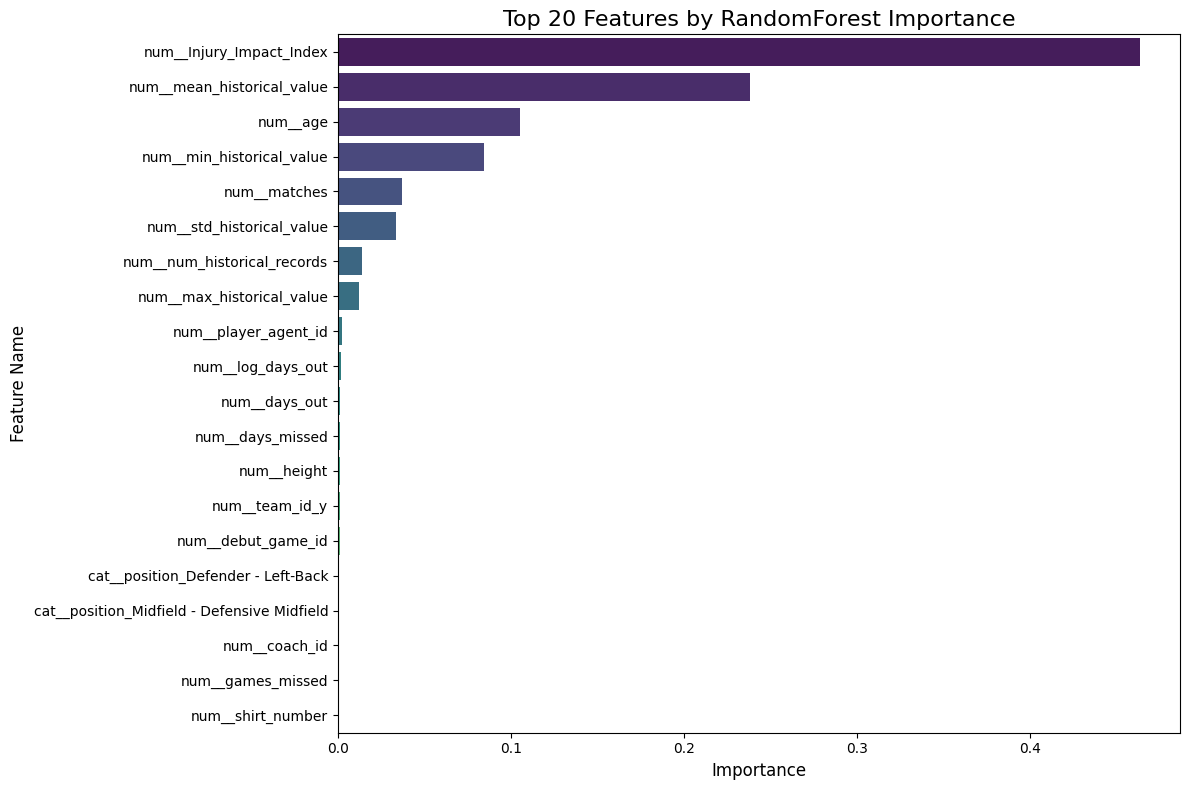


Feature importances saved to 'random_forest_feature_importances.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for np.all

print("\n--- Feature Selection using Random Forest Importance ---")

# Get feature importances from the trained Random Forest model
# Check if rf_model exists and was properly trained (i.e., feature_importances_ is not all zeros)
# The previous cell (7OaWDnODbf-K) shows a KeyboardInterrupt during RandomForest training.
# This means the rf_model object might be incomplete or its feature_importances_ are all zero.
if 'rf_model' in locals() and hasattr(rf_model, 'feature_importances_') and not np.all(rf_model.feature_importances_ == 0):
    feature_importances = rf_model.feature_importances_

    # Create a DataFrame for better visualization
    features_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    })

    # Sort features by importance in descending order
    features_df = features_df.sort_values(by='Importance', ascending=False)

    print("Top 20 Features by Importance:")
    print(features_df.head(20))

    # Visualize top N features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette='viridis')
    plt.title('Top 20 Features by RandomForest Importance', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature Name', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Save the sorted feature importances to a CSV file
    features_df.to_csv('random_forest_feature_importances.csv', index=False)
    print("\nFeature importances saved to 'random_forest_feature_importances.csv'")
else:
    print("Warning: Random Forest model (rf_model) was not trained or its feature importances are all zero.")
    print("Please ensure the RandomForest Regressor in the previous cell (7OaWDnODbf-K) is successfully trained without interruption.")
    print("The graph cannot be generated until valid feature importances are available.")

# You can now select a subset of these features for further model training.
# For example, to get the top 50 features:
# top_n_features = features_df['Feature'].head(50).tolist()
# X_train_selected = X_train[top_n_features]
# X_test_selected = X_test[top_n_features]
# Then retrain a model with X_train_selected and X_test_selected


#####Milestone 4:Model evaluation & hypertuning

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

print("--- Splitting data into Train, Validation, and Test sets ---")

# Load the previously saved training and testing datasets
X_train_prev = pd.read_csv('X_train_final_processed.csv')
y_train_prev = pd.read_csv('y_train_final_processed.csv')
X_test_prev = pd.read_csv('X_test_final_processed.csv')
y_test_prev = pd.read_csv('y_test_final_processed.csv')

# Ensure consistency in number of rows before concatenation
# For training data
min_len_train_prev = min(len(X_train_prev), len(y_train_prev))
X_train_prev = X_train_prev.head(min_len_train_prev).copy()
y_train_prev = y_train_prev.head(min_len_train_prev).copy()
print(f"Adjusted X_train_prev and y_train_prev to consistent length: {min_len_train_prev}")

# For testing data
min_len_test_prev = min(len(X_test_prev), len(y_test_prev))
X_test_prev = X_test_prev.head(min_len_test_prev).copy()
y_test_prev = y_test_prev.head(min_len_test_prev).copy()
print(f"Adjusted X_test_prev and y_test_prev to consistent length: {min_len_test_prev}")

# Concatenate them to recreate the full processed dataset
X_full = pd.concat([X_train_prev, X_test_prev], ignore_index=True)
y_full = pd.concat([y_train_prev, y_test_prev], ignore_index=True)

# Final check for consistency after concatenation
if len(X_full) != len(y_full):
    min_len_full = min(len(X_full), len(y_full))
    X_full = X_full.head(min_len_full).copy()
    y_full = y_full.head(min_len_full).copy()
    print(f"Final adjustment: X_full and y_full to consistent length: {min_len_full}")

print(f"Full processed X shape: {X_full.shape}")
print(f"Full processed y shape: {y_full.shape}")

# Step 1: Split into training set (80%) and temporary set (20% for validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Step 2: Split the temporary set into validation (10% of total) and test set (10% of total)
# Since X_temp is 20% of the full data, splitting it in half gives 10% each
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nNew X_train shape: {X_train.shape}")
print(f"New y_train shape: {y_train.shape}")
print(f"New X_val shape: {X_val.shape}")
print(f"New y_val shape: {y_val.shape}")
print(f"New X_test shape: {X_test.shape}")
print(f"New y_test shape: {y_test.shape}")

# Save the new training, validation, and testing sets to CSV files
X_train.to_csv('X_train_new.csv', index=False)
y_train.to_csv('y_train_new.csv', index=False)
X_val.to_csv('X_val_new.csv', index=False)
y_val.to_csv('y_val_new.csv', index=False)
X_test.to_csv('X_test_new.csv', index=False)
y_test.to_csv('y_test_new.csv', index=False)

print("\nNew training, validation, and testing sets saved to 'X_train_new.csv', 'y_train_new.csv', 'X_val_new.csv', 'y_val_new.csv', 'X_test_new.csv', and 'y_test_new.csv'.")

--- Splitting data into Train, Validation, and Test sets ---
Adjusted X_train_prev and y_train_prev to consistent length: 121426
Adjusted X_test_prev and y_test_prev to consistent length: 109256
Full processed X shape: (230682, 408)
Full processed y shape: (230682, 1)

New X_train shape: (184545, 408)
New y_train shape: (184545, 1)
New X_val shape: (23068, 408)
New y_val shape: (23068, 1)
New X_test shape: (23069, 408)
New y_test shape: (23069, 1)

New training, validation, and testing sets saved to 'X_train_new.csv', 'y_train_new.csv', 'X_val_new.csv', 'y_val_new.csv', 'X_test_new.csv', and 'y_test_new.csv'.


#####lightgbm

In [5]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
from google.colab import files

print("--- Training LightGBM Regressor Model ---")

# Load the new training and validation datasets
X_train = pd.read_csv('X_train_new.csv')
y_train = pd.read_csv('y_train_new.csv')
X_val = pd.read_csv('X_val_new.csv')
y_val = pd.read_csv('y_val_new.csv')

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

# Initialize LightGBM Regressor model
lgbm_model = lgb.LGBMRegressor(
    random_state=42,
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31
)

# Train the model
lgbm_model.fit(X_train, y_train.values.ravel())

print("LightGBM Regressor model trained successfully.")

# Make predictions on the validation set
y_pred_lgbm = lgbm_model.predict(X_val)

# Evaluate the model
mae_lgbm = mean_absolute_error(y_val, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_val, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_val, y_pred_lgbm)

print("\nModel Evaluation (LightGBM Regressor on Validation Set):")
print(f"R-squared (R2): {r2_lgbm:.4f}")
print(f"MAE: {mae_lgbm:.2f}")
print(f"MSE: {mse_lgbm:.2f}")
print(f"RMSE: {rmse_lgbm:.2f}")

# -----------------------------
# Save & Download Model
# -----------------------------
print("\n--- Saving LightGBM Model ---")

model_path = "lightgbm_regressor_model.pkl"

joblib.dump(lgbm_model, model_path)
print(f"LightGBM model saved as {model_path}")

# Download in Colab
files.download(model_path)


--- Training LightGBM Regressor Model ---
X_train shape: (184545, 408)
y_train shape: (184545, 1)
X_val shape: (23068, 408)
y_val shape: (23068, 1)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5888
[LightGBM] [Info] Number of data points in the train set: 184545, number of used features: 309
[LightGBM] [Info] Start training from score 589386.748490
LightGBM Regressor model trained successfully.

Model Evaluation (LightGBM Regressor on Validation Set):
R-squared (R2): 0.9751
MAE: 58689.29
MSE: 16984839764.26
RMSE: 130325.90

--- Saving LightGBM Model ---
LightGBM model saved as lightgbm_regressor_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Final Evaluation on Test Set


In [6]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\n--- Final Evaluation: Decision Tree Regressor on Untouched Test Set ---")

# 1. Load the untouched test features and target
X_test_final = pd.read_csv('X_test_new.csv')
y_test_final = pd.read_csv('y_test_new.csv')

print(f"X_test_final shape: {X_test_final.shape}")
print(f"y_test_final shape: {y_test_final.shape}")

# 2. Use the previously trained dt_model to make predictions on the loaded X_test data
y_pred_dt_final = dt_model.predict(X_test_final)

# 3. Calculate the R-squared score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
mae_dt_final = mean_absolute_error(y_test_final, y_pred_dt_final)
mse_dt_final = mean_squared_error(y_test_final, y_pred_dt_final)
rmse_dt_final = np.sqrt(mse_dt_final)
r2_dt_final = r2_score(y_test_final, y_pred_dt_final)

# 4. Print all calculated evaluation metrics
print("\nModel Evaluation (Decision Tree Regressor on Untouched Test Set):")
print(f"R-squared (R2) Score: {r2_dt_final:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt_final:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt_final:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt_final:.2f}")


--- Final Evaluation: Decision Tree Regressor on Untouched Test Set ---
X_test_final shape: (23069, 408)
y_test_final shape: (23069, 1)

Model Evaluation (Decision Tree Regressor on Untouched Test Set):
R-squared (R2) Score: 0.9842
Mean Absolute Error (MAE): 14499.33
Mean Squared Error (MSE): 10626989683.12
Root Mean Squared Error (RMSE): 103087.29


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


## Hyperparameter Tuning


In [7]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("--- Starting Hyperparameter Tuning for Decision Tree Regressor ---")

# 1. Load the training and validation datasets
X_train = pd.read_csv('X_train_new.csv')
y_train = pd.read_csv('y_train_new.csv')
X_val = pd.read_csv('X_val_new.csv')
y_val = pd.read_csv('y_val_new.csv')

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

# 2. Define a parameter grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.6, 0.8, 1.0] # 1.0 is equivalent to 'auto' or 'None' here
}

print("Parameter grid defined for Decision Tree Regressor.")

print("\nInitializing GridSearchCV...")
# 3. Initialize GridSearchCV
# For performance and to prevent long run times, keep cv value small
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error', # MAE is the primary metric for comparison
                           cv=3, # Using 3-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           verbose=2) # Print progress


# 4. Fit GridSearchCV to the training data
print("\nFitting GridSearchCV to training data. This may take a while...")
grid_search.fit(X_train, y_train)

print("GridSearchCV fitting complete.")

# 6. Print the best hyperparameters found by the grid search
print("\nBest hyperparameters found:")
print(grid_search.best_params_)

# 7. Print the best score (MAE) achieved by the best model
print("\nBest score (Negative MAE) found:")
print(grid_search.best_score_)

# 8. Retrieve the best estimator
best_dt_model = grid_search.best_estimator_
print("\nBest Decision Tree Regressor estimator retrieved.")

# 9. Make predictions on the validation set using the best estimator
y_pred_best_dt = best_dt_model.predict(X_val)

# 10. Calculate and print evaluation metrics for the best model on the validation set
mae_best_dt = mean_absolute_error(y_val, y_pred_best_dt)
mse_best_dt = mean_squared_error(y_val, y_pred_best_dt)
rmse_best_dt = np.sqrt(mse_best_dt)
r2_best_dt = r2_score(y_val, y_pred_best_dt)

print("\nModel Evaluation (Best Decision Tree Regressor on Validation Set):")
print(f"R-squared (R2) Score: {r2_best_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_best_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_dt:.2f}")

--- Starting Hyperparameter Tuning for Decision Tree Regressor ---
X_train shape: (184545, 408)
y_train shape: (184545, 1)
X_val shape: (23068, 408)
y_val shape: (23068, 1)
Parameter grid defined for Decision Tree Regressor.

Initializing GridSearchCV...

Fitting GridSearchCV to training data. This may take a while...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
GridSearchCV fitting complete.

Best hyperparameters found:
{'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best score (Negative MAE) found:
-31756.504396453976

Best Decision Tree Regressor estimator retrieved.

Model Evaluation (Best Decision Tree Regressor on Validation Set):
R-squared (R2) Score: 0.9793
Mean Absolute Error (MAE): 24830.43
Mean Squared Error (MSE): 14123691713.46
Root Mean Squared Error (RMSE): 118843.14
